In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['passengerid', 'name', 'ticket'], axis=1, inplace=True, errors='ignore')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
dtype = df.dtypes
n_unique = df.nunique()
pd.DataFrame({'dtype': dtype, "Num_unique": n_unique}).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
dtype,int64,int64,int64,str,str,float64,int64,int64,str,float64,str,str
Num_unique,891,2,3,891,2,88,7,7,681,248,147,3


In [14]:
def chk(df):

    dtype = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({'dtype': dtype, "Num_unique": n_unique}).T

In [15]:
chk(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
dtype,int64,int64,int64,str,str,float64,int64,int64,str,float64,str,str
Num_unique,891,2,3,891,2,88,7,7,681,248,147,3


In [7]:
from pp import chk
chk(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
dtype,int64,int64,int64,str,str,float64,int64,int64,str,float64,str,str
Num_unique,891,2,3,891,2,88,7,7,681,248,147,3


In [9]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
df[cols] = df[cols].astype('category')

In [10]:
chk(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
dtype,int64,category,category,str,category,float64,category,category,str,float64,str,category
Num_unique,891,2,3,891,2,88,7,7,681,248,147,3


In [13]:
df.shape[0]

891

In [15]:
null = df.isnull().sum()
ratio = null / df.shape[0]
ratio

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [24]:
def chk_null(df):
    null = df.isnull().sum()
    ratio = null / df.shape[0]
    return pd.DataFrame({'null': null, "ratio": ratio}).T

In [3]:
from null import chk, chk_nulls
chk_nulls(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
null,0.0,0.0,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.0,0.771044,0.002245


In [5]:
df = df.dropna(subset=['Embarked'])

In [6]:
df = df.drop('Cabin', axis= 1)

In [8]:
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

/tmp/ipykernel_260290/3397469017.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Age'].fillna(median, inplace=True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [9]:
chk_nulls(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
null,0.0,0.0,0.0,0.0,0.0,177.0000,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.1991,0.0,0.0,0.0,0.0,0.0


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

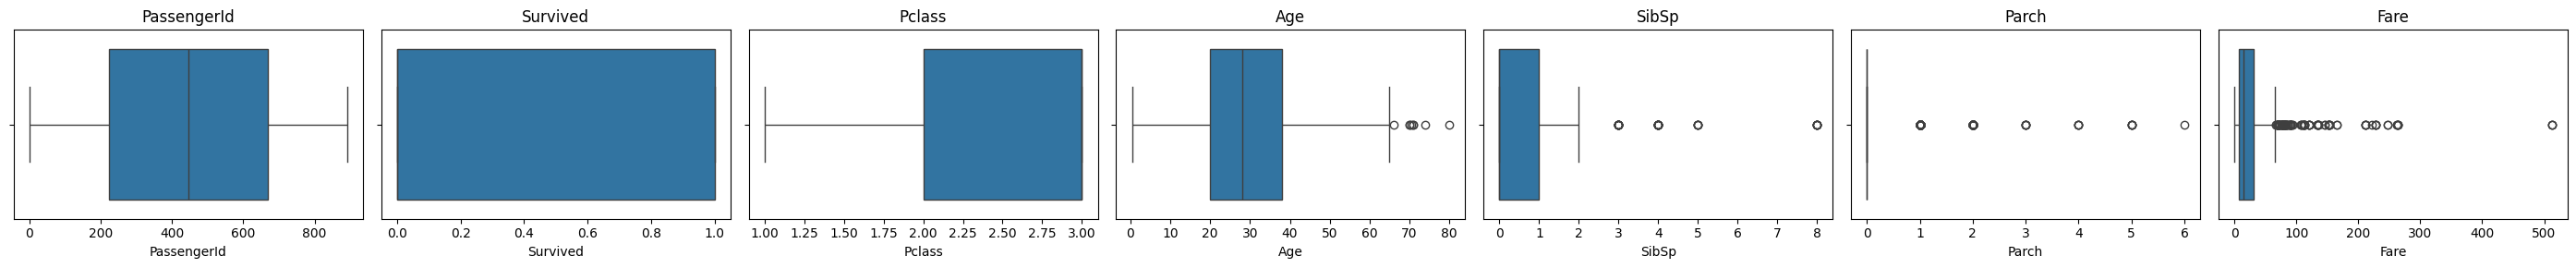

In [ ]:
num_cols = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(1, len(num_cols), figsize=(len(num_cols)*4, 3))

if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):
    sns.boxplot(x=df[col], orient='h', ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

lower_outliers = df[df[col] < lower_fence]
upper_outliers = df[df[col] > upper_fence]

df[col].replace(lower_outliers[col], lower_fence, inplace=True)
df[col].replace(upper_outliers[col], upper_fence, inplace=True)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


In [27]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.drop_duplicates(inplace=True)

In [23]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64